In [3]:
import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Clustering

Dataset is blobs.csv.

The results should be presented as drawn clusters.

3. (2) Implement the k-means algorithm and cluster data point into [2,3,4,5] clusters.

In [60]:
def load_data(dataset_path):
    reader = csv.reader(open(dataset_path))
    reader.__next__()  # skip the header
    data = []
    for row in reader:
        data.append(list(map(float, row)))
    return data

def dist(row1, row2):
    return np.linalg.norm(np.array(row1) - np.array(row2))

def kmeans(data, k):
    row_id_to_cluster_id = [None for _ in data]
    clusters = random.sample(data, k)
    for _ in range(100):
        for row_id, row in enumerate(data):
            cluster_id = min(range(k),
                    key=lambda cluster_id:
                    dist(row, clusters[cluster_id]))
            row_id_to_cluster_id[row_id] = cluster_id
        for cluster_id in range(k):
            cluster_row_ids = list(filter(
                lambda row_id: row_id_to_cluster_id[row_id] == cluster_id,
                range(len(data))))
            cluster_rows = [data[id] for id in cluster_row_ids]
            sum_row = [0 for _ in range(len(data[0]))]
            for row in cluster_rows:
                for col_id, cell in enumerate(row):
                    sum_row[col_id] += cell
            num_clusters = len(cluster_rows)
            for row in cluster_rows:
                for col_id, _ in enumerate(row):
                    row[col_id] /= num_clusters
    return row_id_to_cluster_id
                    
def go(dataset_path, answer_path, ks=[2,3,4,5]):
    data = load_data(dataset_path)
    for k in ks:
        print(k)
        row_id_to_cluster_id = kmeans(data, k)
        with open(answer_path + str(k), 'w') as f:
            f.write(' '.join(list(map(str, row_id_to_cluster_id))))

DATASET_PATH = 'datasets/blobs.csv'
ANSWER_PATH_PREFIX = 'answers/blobs_kmeans_'

In [61]:
go(DATASET_PATH, 'answers/blobs_kmeans_')
print('done')

2
3
4
5
done


In [62]:
def load_cluster_ids(answer_path):
    with open(answer_path) as f:
        line = f.readline()
        return list(map(int, line.split()))

def plot_clusters(data, cluster_ids):
    colors = 'rbgmc'
    for row, cluster_id in zip(data, cluster_ids):
        plt.plot(*row, colors[cluster_id] + 'o')
    plt.show()

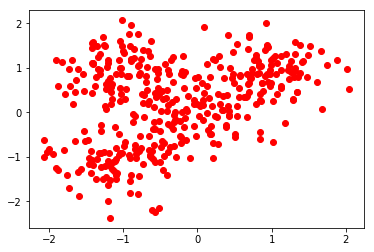

In [65]:
data = load_data(DATASET_PATH)
data = random.sample(data, 10)
cluster_ids = load_cluster_ids(ANSWER_PATH_PREFIX + '2')
plot_clusters(data, cluster_ids)